In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
loans_df = pd.read_csv("preprocessed_loans_stage1.csv",low_memory=False ,index_col=False)
filtered_loans_df = loans_df[(loans_df["loan_status"] == "Fully Paid") |
                            (loans_df["loan_status"] == "Charged Off")]

In [3]:
loans_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_util,debt_settlement_flag,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year
0,0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,3.0,...,83.7,N,2011,12,1,1985,1,2015,12,2017
1,1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,3.0,...,9.4,N,2011,12,4,1999,4,2013,10,2016
2,2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,2.0,...,98.5,N,2011,12,11,2001,6,2014,6,2017
3,3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,10.0,...,21.0,N,2011,12,2,1996,1,2015,4,2016
4,4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,15.0,...,53.9,N,2011,12,1,1996,1,2017,1,2017


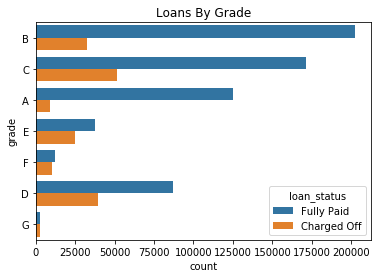

In [4]:
g = sns.countplot(y="grade", hue="loan_status", data=filtered_loans_df);
g.set_title(label="Loans By Grade")

<h3>Lets answer few questions :</h3>
<h4>1.Is there any significant change in the interest rate for the year 2015 and 2016 for grade E loans ? </h4>

In [5]:
#Filter Data for the year 2015
filtered_loans_2015_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2015) ]

#Filter Data for the year 2016
filtered_loans_2016_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2016) ]

Lets plot the graphs for the year 2015 and 2016

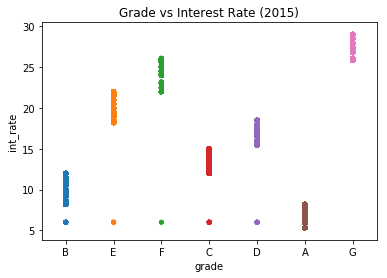

In [6]:
g = sns.stripplot(x="grade", y="int_rate", data=filtered_loans_2015_df);
g.set_title("Grade vs Interest Rate (2015)")

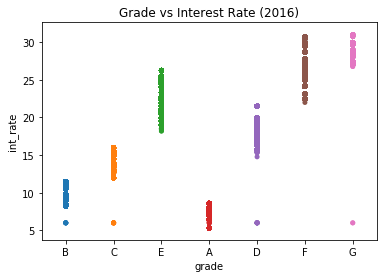

In [7]:
g = sns.stripplot(x="grade", y="int_rate", data=filtered_loans_2016_df);
g.set_title("Grade vs Interest Rate (2016)")

<p>From the above graphs ,we can see that there is a difference in the range of interest rates for the years 2015 and 2016 epecially. The loans with grades D,E,F,G have the high risk to default and thats why the interest rates are so high.  The increare in the interest rates for the year 2016 may be due to the increase in the charged off rate in the year 2015. The loans with grades  c & D have the highest number of charged off rate in 2015. <p>

<p>Lets see if there is a significanct difference interest rates for the year 2015 and 2016</p>

<p>Null Hypothesis : There is no difference in the interest rates for grade E loans in 2015 and 2016.</p>
<p>Alternate Hypothesis : There is diffen=rence in the interest rates for grade E loans in 2015 and 2016.</p>

In [8]:
#interest rates for grade E loans for the year 2015
int_rate_2015 = loans_df[(loans_df.grade=="E") & (loans_df.issue_year==2015) ]['int_rate']
#interest rates for grade E loans for the year 2016
int_rate_2016 = loans_df[(loans_df.grade=="E") & (loans_df.issue_year==2016) ]['int_rate']


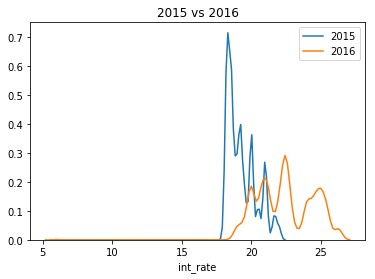

In [9]:
sns.distplot(int_rate_2015,hist=False,label='2015')
sns.distplot(int_rate_2016,hist=False,label='2016')
plt.title('2015 vs 2016')

In [10]:
#Difference in the means
print("Difference in the interest rates:", int_rate_2015.mean() - int_rate_2016.mean())

#t-test
stats.ttest_ind(int_rate_2015, int_rate_2016)

Difference in the interest rates: -3.139788471671441


Ttest_indResult(statistic=-253.38576129739511, pvalue=0.0)

p-value < 0.05 , so we can reject the null hypothesis in favor to alternate hypothesis. so there is a significant difference in the intereset rates for the years 2015 and 2016 for grade E loans. There is an increase of 3.13 interest rate for grade E loans.

<h4> 2. Does loan purpose has the significant impact on the charged off rate?</h4>

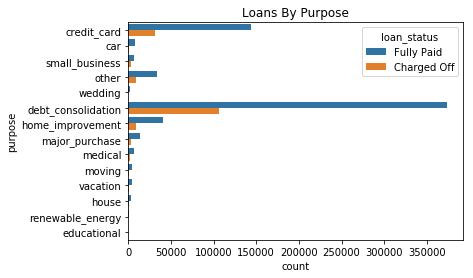

In [11]:
#Plot the graph for loans by purpose
g = sns.countplot(y="purpose", hue="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Purpose")

From the above , we can see that the loans with debt consolidation as purpose have highest number of loans issued and charged off loans as well.It is eveident from the graph that there is relationship between the purpose and loan status.Lets use statistical test to prove it.


<h4>What are null and alternate hypothesis ? </h4>

<p> H0: Null Hypothesis : Loans Purpose has no significant assoication with the loan status </p>
<p> HA: Loans Purpose has no significant assoication with the loan status </p>

<h4>Which statistical test to be used ? </h4>


The chi-square test of independence is a statistical test used to determine whether two categorical variables are independent of each other or not.The Chi-Square test of independence can be performed using the chi2_contingency function in the SciPy package

In [12]:
from scipy.stats import chi2_contingency
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    print(ctsum)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
print(chisq_of_df_cols(filtered_loans_df, 'loan_status' , 'purpose'))

loan_status         Charged Off  Fully Paid
purpose                                    
car                        1320        7386
credit_card               31914      143734
debt_consolidation       106717      373614
educational                  56         270
home_improvement           9312       40252
house                       895        3015
major_purchase             3222       13809
medical                    2004        6486
moving                     1383        4163
other                      9567       33185
renewable_energy            150         445
small_business             3103        7024
vacation                   1007        3871
wedding                     277        1996
(2461.2539968957035, 0.0, 13, array([[  1.83674736e+03,   6.86925264e+03],
       [  3.70573167e+04,   1.38590683e+05],
       [  1.01337778e+05,   3.78993222e+05],
       [  6.87778127e+01,   2.57222187e+02],
       [  1.04567592e+04,   3.91072408e+04],
       [  8.24911803e+02,   3.08508820e+0

<p>The first value is chi-square value</p>
<p>The second value is p-value</p>
<p>The third value is degree of freedom</p>
<p>The fourth one is array of expected frequencies, based on the marginal sums of the table.</p>

The p-value is 0.0 , so we reject the null hypotheis in the favor of alternate hypothesis. So there is a statistical significant association beteween loan purpose and the loan status.